<a href="https://colab.research.google.com/github/ARUNAGIRI1617/LGMVIP-DataScience/blob/main/Task2_Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PACKAGES

In [292]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


LOADING DATASET

In [294]:

df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [295]:
df.shape

(18870, 135)

In [296]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [297]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [298]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [299]:
df.shape

(18870, 18)

DETECTING NONE

In [300]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            85
Region            0
City              0
latitude        747
longitude       747
Attacktype        0
kill           3522
Wound          5043
target1         192
summary       17913
Group             0
Targettype        0
Weapon            0
motive        18182
dtype: int64

In [301]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
df['Casualities'] = df['kill'] + df['Wound']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         18870 non-null  int64  
 1   Month        18870 non-null  int64  
 2   day          18870 non-null  int64  
 3   Country      18870 non-null  object 
 4   State        18785 non-null  object 
 5   Region       18870 non-null  object 
 6   City         18870 non-null  object 
 7   latitude     18123 non-null  float64
 8   longitude    18123 non-null  float64
 9   Attacktype   18870 non-null  object 
 10  kill         18870 non-null  float64
 11  Wound        18870 non-null  float64
 12  target1      18678 non-null  object 
 13  summary      957 non-null    object 
 14  Group        18870 non-null  object 
 15  Targettype   18870 non-null  object 
 16  Weapon       18870 non-null  object 
 17  motive       688 non-null    object 
 18  Casualities  18870 non-null  float64
dtypes: f

In [302]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,18870.000000,18870.000000,18870.000000,18123.000000,1.812300e+04,18870.000000,18870.000000,18870.000000
mean,1978.517011,6.198781,15.206465,26.370738,-4.786345e+03,1.360201,1.042819,2.403021
std,3.409654,3.448318,8.955007,22.515713,6.402079e+05,6.792179,8.777369,12.047950
min,1970.000000,0.000000,0.000000,-45.867889,-8.618590e+07,0.000000,0.000000,0.000000
25%,1977.000000,3.000000,8.000000,13.692880,-8.688120e+01,0.000000,0.000000,0.000000
50%,1979.000000,6.000000,15.000000,33.888523,-6.926293e+00,0.000000,0.000000,0.000000
75%,1981.000000,9.000000,23.000000,43.184180,9.174508e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.726362e+02,422.000000,700.000000,760.000000


In [305]:
print('Country with most attacks: ',df['Country'].value_counts().idxmax())
print('City with most attacks: ',df['City'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['Attacktype'].value_counts().idxmax())

Country with most attacks:  El Salvador
City with most attacks:  Belfast
Region with the most attacks: Western Europe
Year with the most attacks: 1980
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


EXPLORATORY ANALYSIS OF DATA WITH PLOTS

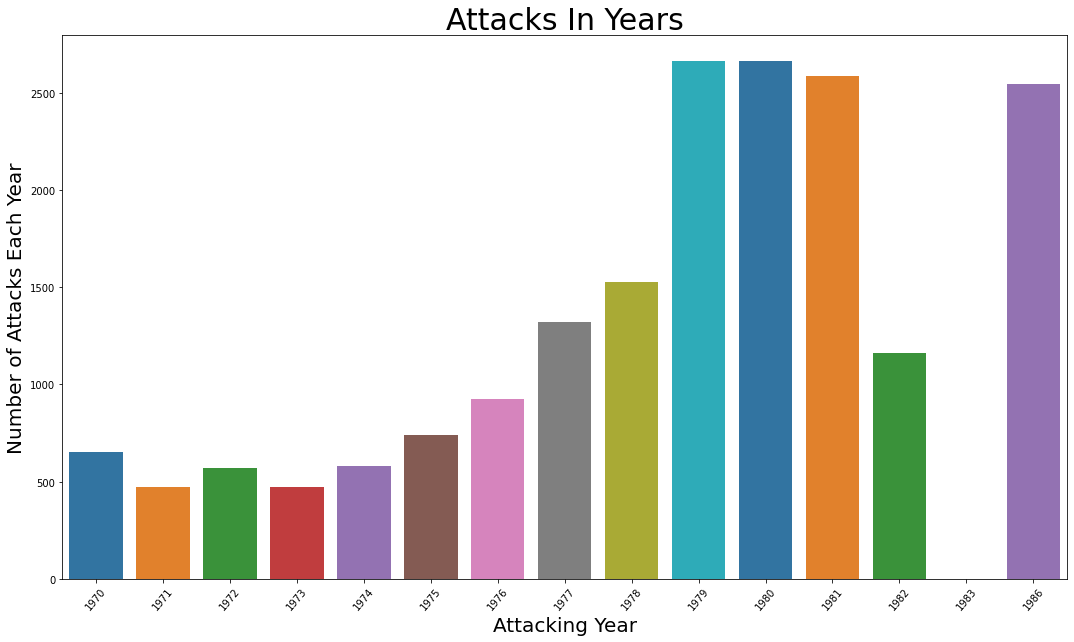

In [306]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()


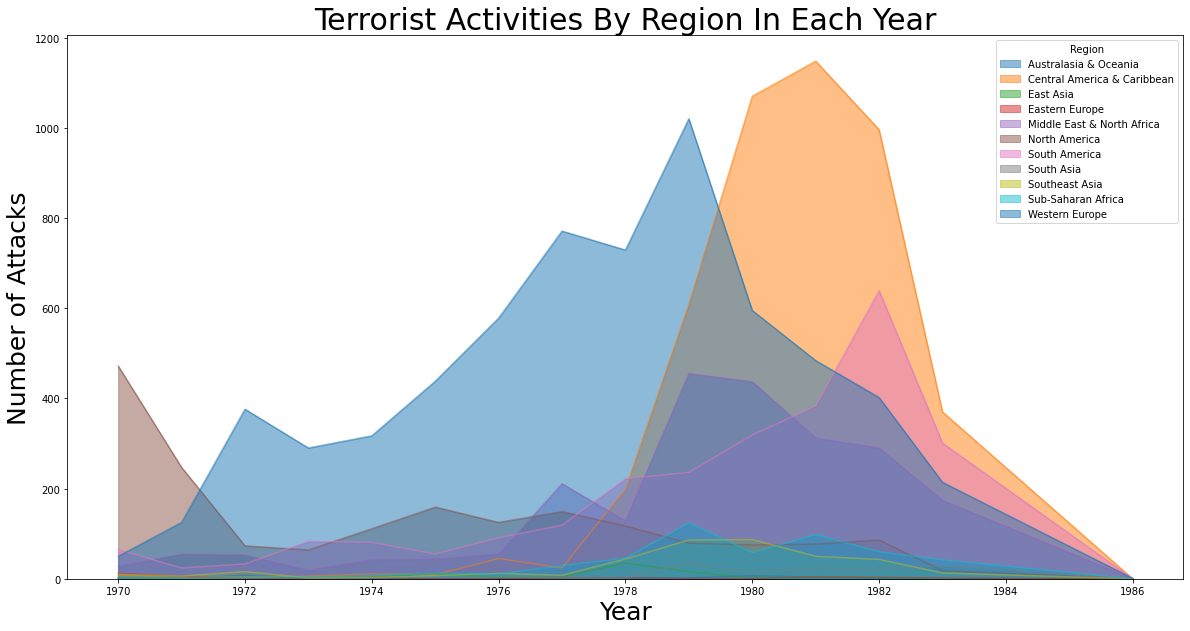

In [307]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xlabel("Year",fontsize=25)
plt.show()

In [308]:
attack = df.Country.value_counts()[:10]
attack

El Salvador       2547
United Kingdom    2087
United States     1711
Spain             1374
Italy             1226
Guatemala         1194
Colombia          1051
France             781
Peru               757
Turkey             593
Name: Country, dtype: int64

In [309]:
df.Group.value_counts()[1:10]

Irish Republican Army (IRA)                         1332
Farabundo Marti National Liberation Front (FMLN)     778
Basque Fatherland and Freedom (ETA)                  768
Shining Path (SL)                                    515
Palestinians                                         416
Revolutionary Armed Forces of Colombia (FARC)        310
M-19 (Movement of April 19)                          259
Protestant extremists                                220
Red Brigades                                         209
Name: Group, dtype: int64

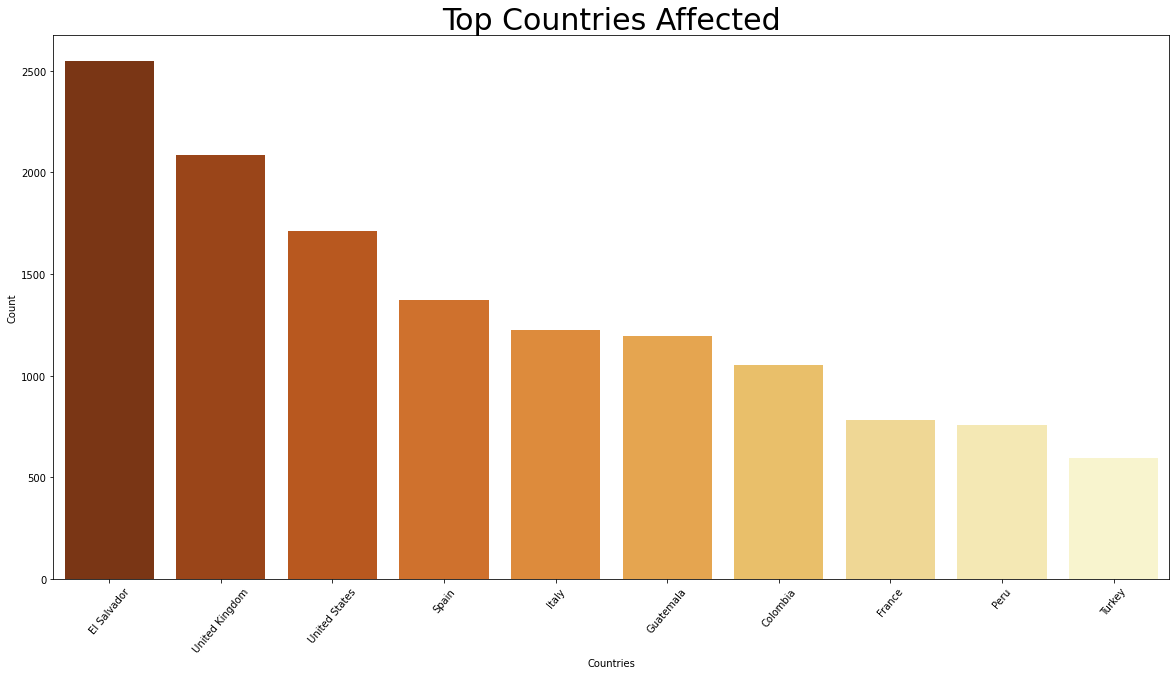

In [310]:

plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected',fontsize=30)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

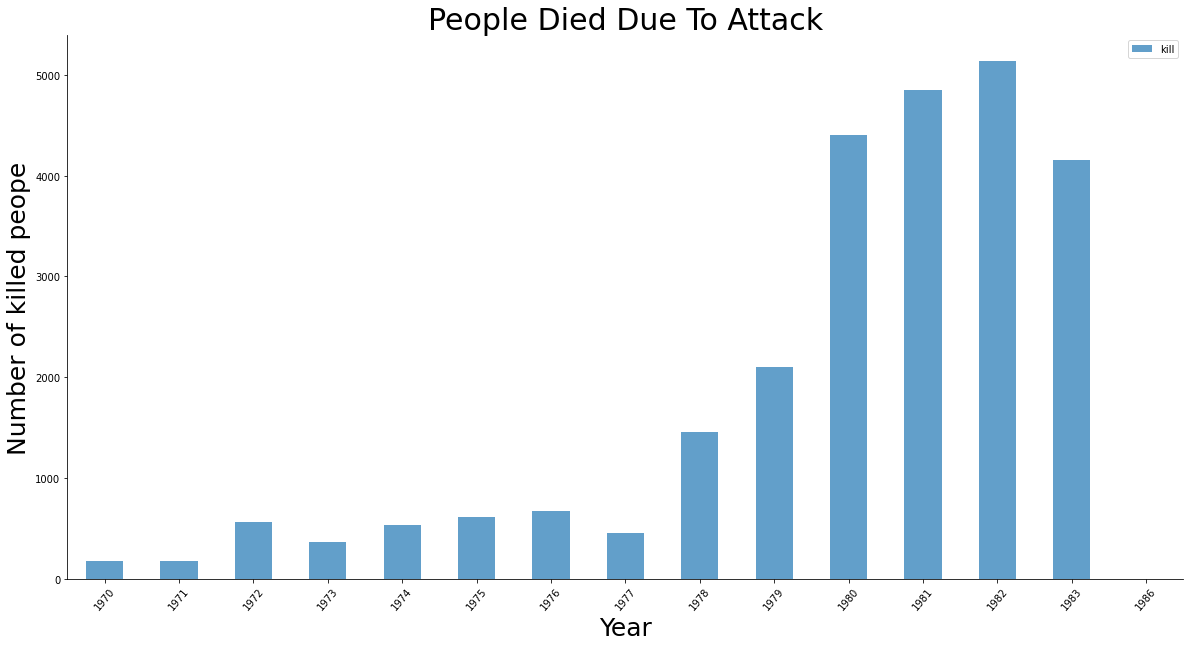

In [311]:
df = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=30)
plt.ylabel("Number of killed peope",fontsize=25)
plt.xlabel('Year',fontsize=25)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

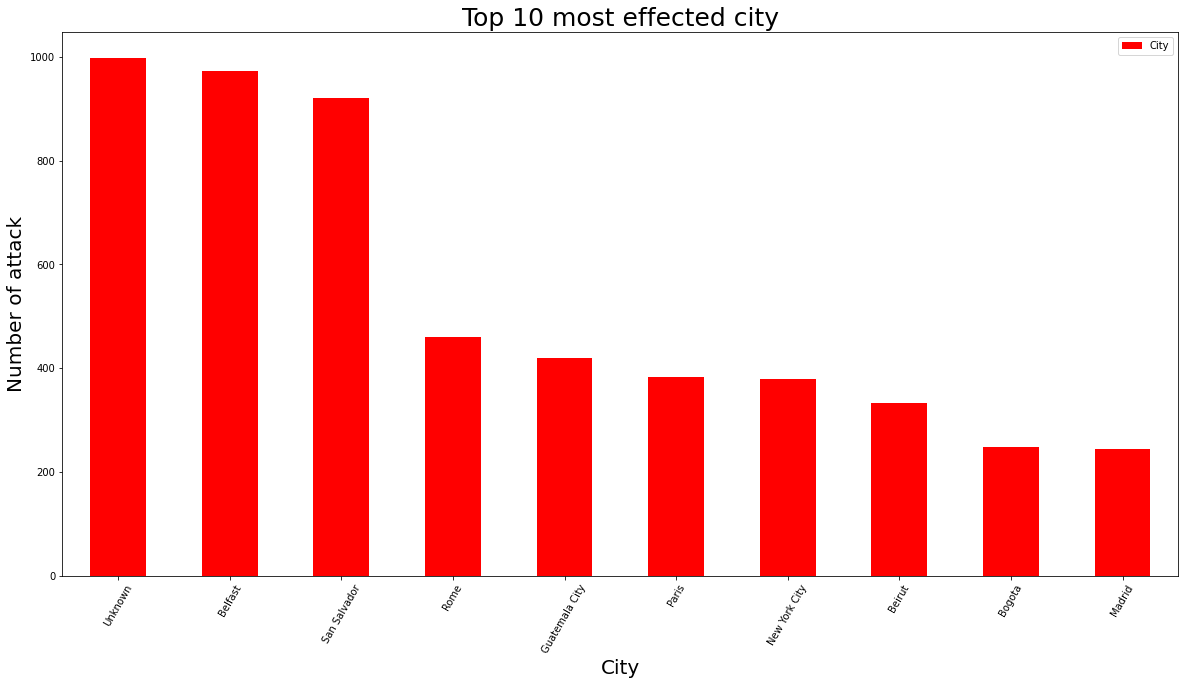

In [ ]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 60)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 10 most effected city",fontsize=25)
plt.show()

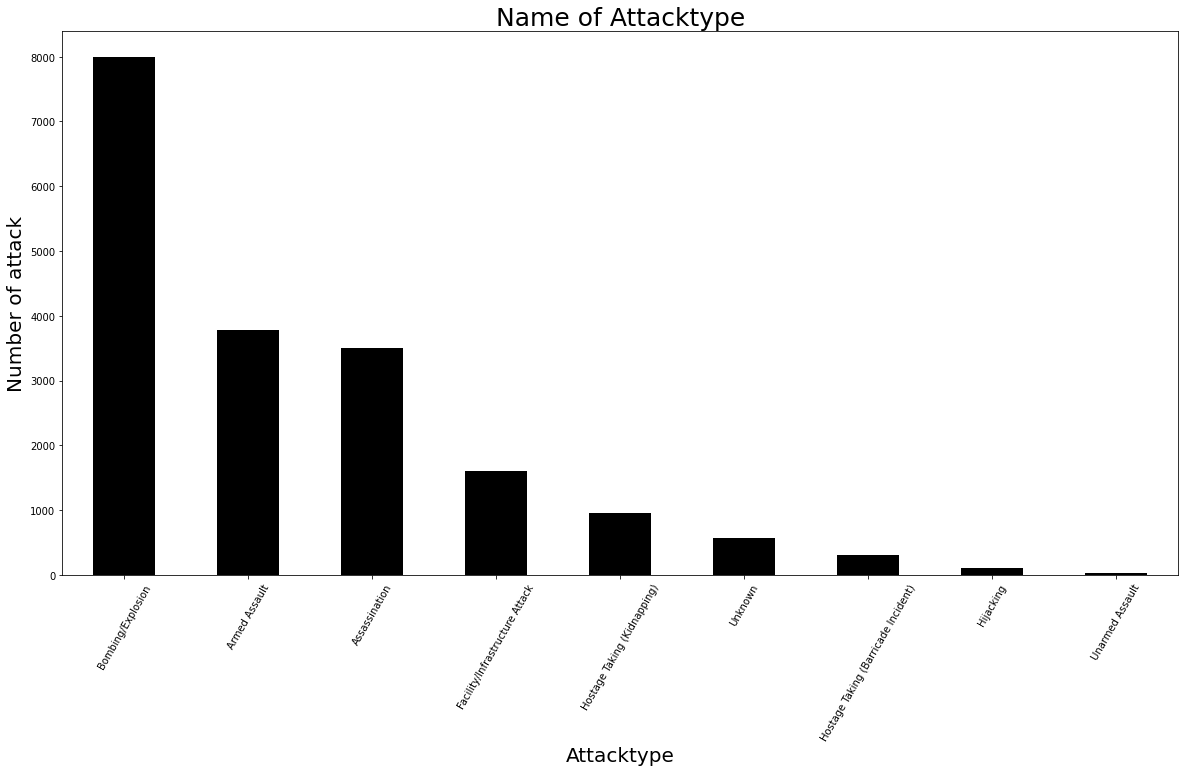

In [ ]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='black')
plt.xticks(rotation = 60)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Name of Attacktype",fontsize=25)
plt.show()

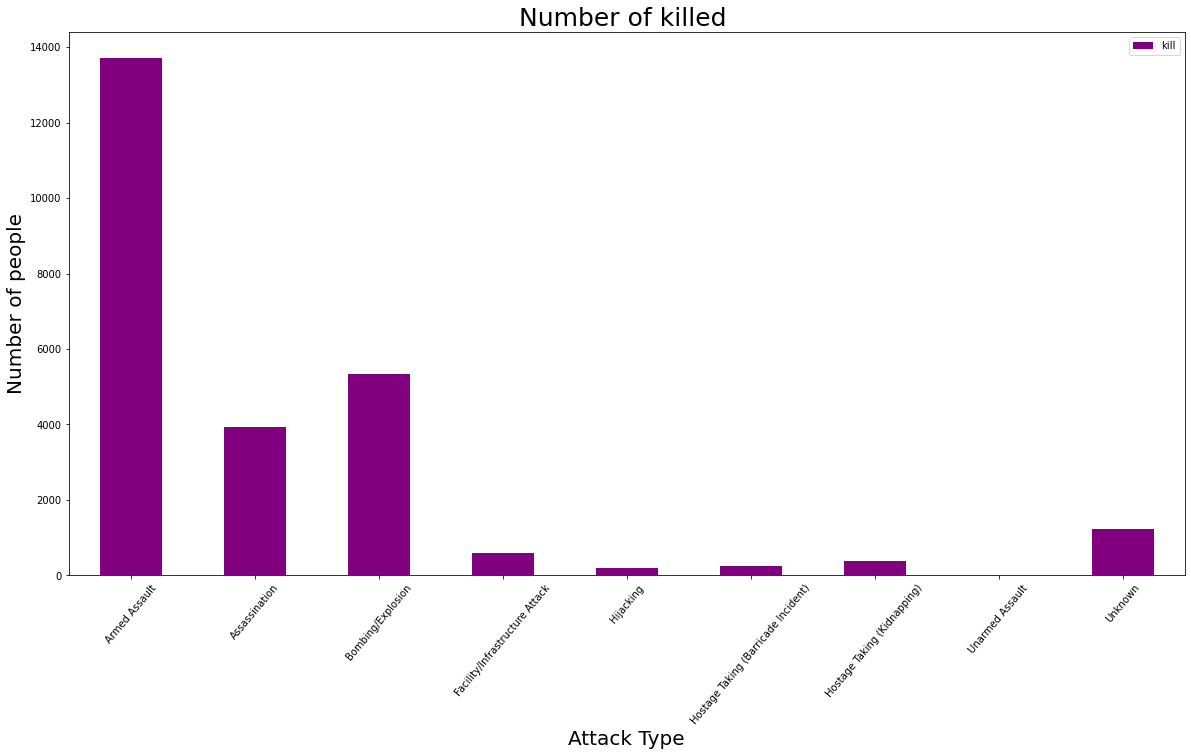

In [ ]:

df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['purple'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

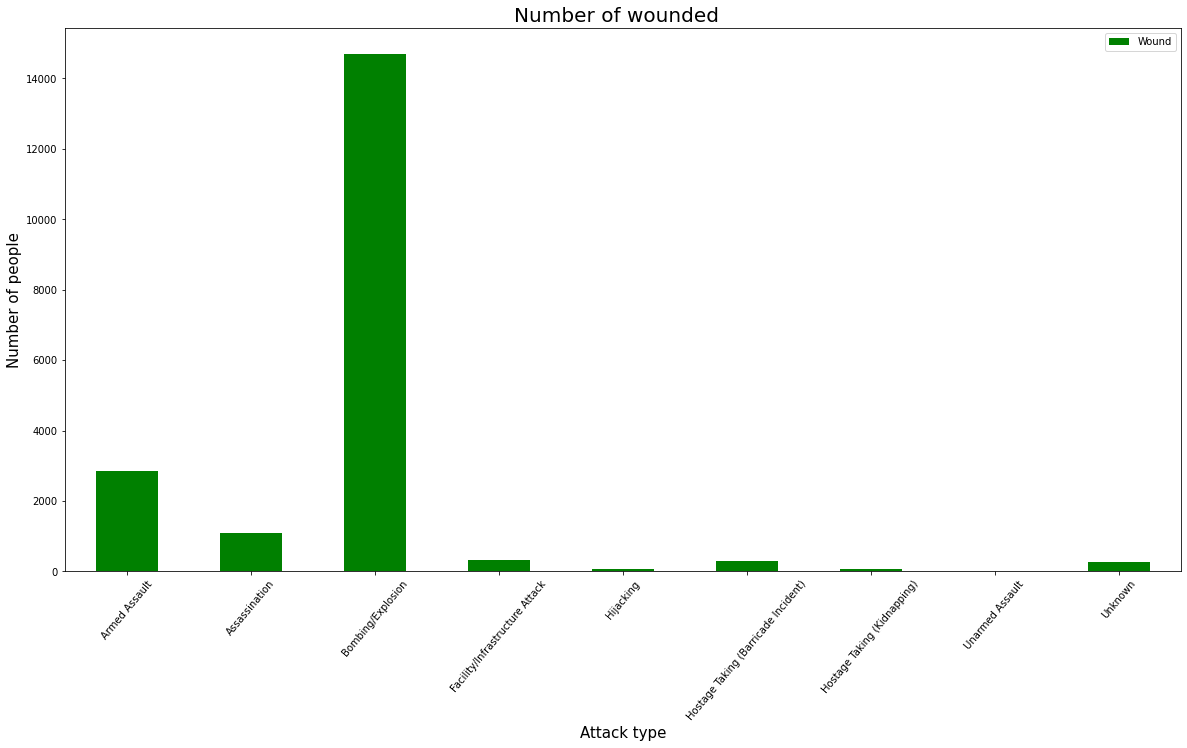

In [ ]:
df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['green'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

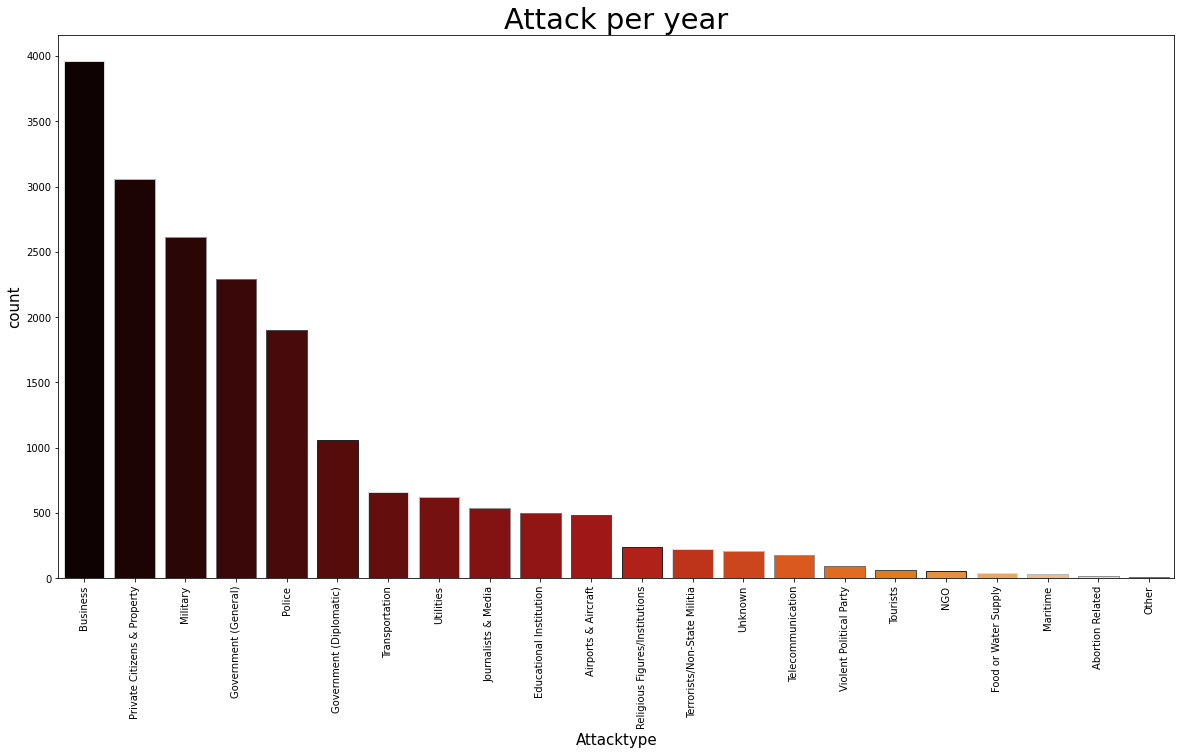

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("binary"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=29)
plt.show()

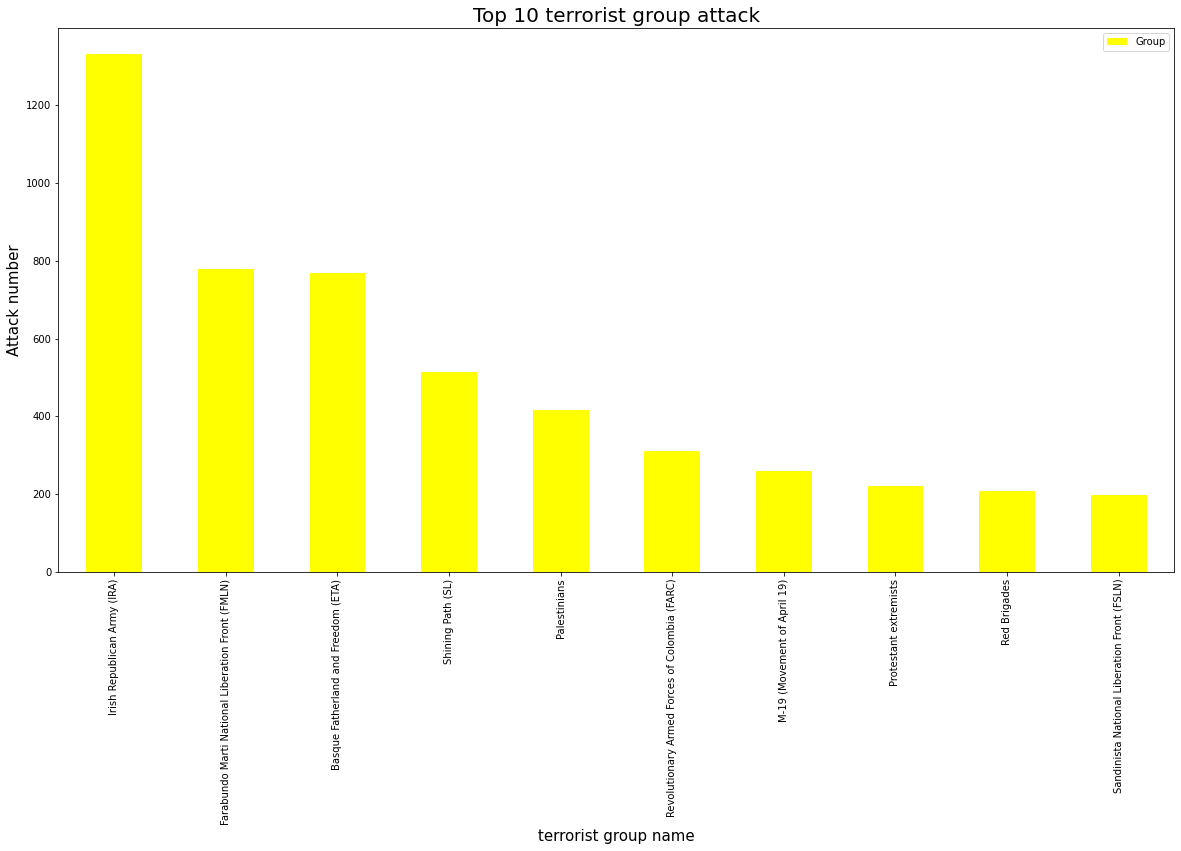

In [ ]:

df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [ ]:
df=df[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Farabundo Marti National Liberation Front (FMLN),El Salvador,3022.0
1,Irish Republican Army (IRA),United Kingdom,1176.0
2,Shining Path (SL),Peru,1165.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,951.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,700.0
5,Guerrilla Army of the Poor (EGP),Guatemala,533.0
6,Mujahedin-e Khalq (MEK),Iran,489.0
7,Contras,Nicaragua,420.0
8,Basque Fatherland and Freedom (ETA),Spain,371.0
9,Moro National Liberation Front (MNLF),Philippines,369.0


In [ ]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Gabon,Greece,...,Qatar,Rhodesia,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,0.0,134.0,329.0,6.0,12.0,0.0,0.0,12.0,73.0,10.0,0.0,12.0,1.0,55.0,0.0,2.0,4.0,3.0,3.0,0.0,38.0,1382.0,11.0,22.0,26.0,0.0,5.0,3.0,11.0,1.0,9.0,73.0,6722.0,135.0,102.0,2.0,126.0,...,1.0,217.0,5.0,0.0,0.0,0.0,1.0,91.0,2.0,81.0,0.0,4.0,527.0,13.0,5.0,0.0,0.0,7.0,50.0,466.0,25.0,1.0,191.0,0.0,41.0,334.0,191.0,10.0,2058.0,218.0,4.0,0.0,37.0,60.0,68.0,0.0,4.0,1.0,5.0,58.0
